# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

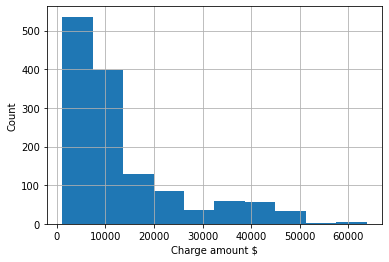

In [9]:
medical.charges.hist()
plt.xlabel('Charge amount $')
plt.ylabel('Count');

In [7]:
print('Mean',medical.charges.mean())
print('STD',medical.charges.std())

Mean 13270.422265141257
STD 12110.011236693994


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ I will create bootstrap samples of the medical charges and build a distribution of the mean of each sample.  Then I will see where $12,000 falls on the sampling distribution. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ It is appropriate to use a one sided confidence interval because the administrator is only concerned the mean charge is too low

In [55]:
### Size of bootstrap sample
boots_size=500
### Number of bootstrap samples
boots_num=500

In [56]:
boots_dist=np.array([np.mean(np.random.choice(medical.charges,size=boots_size,replace=True)) for i in range(boots_num)])

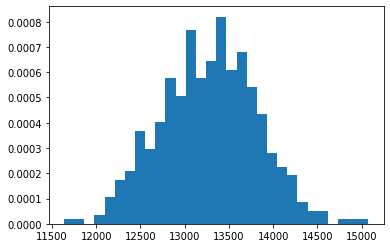

In [57]:
plt.hist(boots_dist,bins=30,density=True);

In [58]:
# P-Value of 12,000
np.sum(boots_dist<=12000)/len(boots_dist)

0.004

In [63]:
print('95% CI: {:.2f}, {:.2f}'.format(np.percentile(boots_dist,2.5),np.percentile(boots_dist,97.5)))

95% CI: 12283.84, 14279.56


__According to this bootstrap sampling of data, the probability of the true mean of charges being equal to or less than $12,000 is less than 1%, outside the 95% CI of (12283.84, 14279.56)__

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ H_0: There is no difference between the charges for the uninsured and the charges for the insured and therefore we would expect that the difference between the means is 0.  
H_A: People with insurance are charged more than people without insurance.

We are assuming that the variances of charges are approximately the same for people with and without insurance


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [68]:
insured=medical.query('insuranceclaim == 1')
uninsured=medical.query('insuranceclaim == 0')

<AxesSubplot:ylabel='Density'>

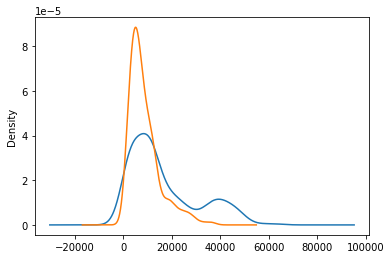

In [72]:
insured.charges.plot.density()
uninsured.charges.plot.density()

In [74]:
n0=uninsured.shape[0]
n1=insured.shape[0]
s0=uninsured.charges.std()
s1=insured.charges.std()

x0=uninsured.charges.mean()
x1=insured.charges.mean()

In [75]:
sp=np.sqrt( ((n0-1)*(s0**2) + (n1-1)*(s1**2))/(n0 + n1 - 2) )

In [100]:
t_stat=(x1 - x0)/(sp*np.sqrt(1/n0 + 1/n1))

In [101]:
print(t_stat)

11.89329903087671


In [109]:
df=insured.shape[0]+uninsured.shape[0]-2

In [124]:
t.ppf(0,df,t_stat)

-inf

In [125]:
t.cdf(0,df,t_stat)

2.230615115810486e-31

__Probability of getting our dataset assuming there is no difference between charges of insured and uninsured.__

__A:__ 

In [131]:
test=ttest_ind(insured.charges,uninsured.charges)

In [132]:
print(test.statistic)

11.893299030876712


In [134]:
print(test.pvalue/2)  ### Because .pvalue retuns two=tailed p-value

2.2306151158103587e-31


__Assuming the null hypothesis, there is a VERY small chance of getting the observed difference between insured and uninsured charges__

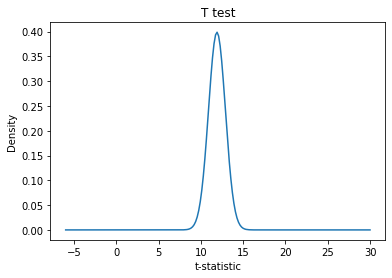

In [115]:
x=np.linspace(-6,30,200)
y=t.pdf(x,df,test.statistic)
plt.plot(x,y)
plt.ylabel('Density')
plt.xlabel('t-statistic')
plt.title('T test');

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ No, I do not see an equivalent function for performing a z test.  This may be because it is easy and straightforward to do with scipy.stats.norm.  

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test